In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib
matplotlib.rcParams['font.family'] = 'Nimbus Sans'
plt.rcParams['font.size'] = 10

In [48]:
data = pd.read_csv('csv/OBA_2018-2023_combined_dataset_working.csv', encoding="latin1")
bombus_data = data[data['Genus'] == 'Bombus']
bombus_OR = bombus_data[bombus_data['State'].isin(['Oregon', 'Oregon ', 'OR'])]
bombus_OR_clean = bombus_OR[['Species', 'Collection Date', 'Dec. Lat.', 'Dec. Long.', 'Collectionmethod']]
bombus_OR_clean['Collectionmethod'].unique()
bombus_OR_clean['Collectionmethod'] = bombus_OR_clean['Collectionmethod'].replace({'Net':'net', 'Vane':'vane', 'Pan':'pan', 'Blue vane':'vane', 'vane ':'vane',
       'pan traps':'pan', 'Vane Trap':'vane', 'Pan Trap':'pan',
       'Blue Pan Trap':'pan', 'White Pan Trap':'pan', 'Blue Vane Trap':'vane', 'vane trap':'vane'})

booc = bombus_OR[bombus_OR['Species'] == 'occidentalis']
print(bombus_OR_clean['Collectionmethod'].value_counts(), '\n\n')

# bombus_OR_clean.to_csv('csv/oba_bombus_cleaned.csv', index=False)

/tmp/ipykernel_369013/452257688.py:1: DtypeWarning: Columns (0,1,2,8,9,10,11,13,15,18,19,20,21,22,23,24,25,26,27,34,35,36,37,42,43,44,45,46,47,48,49,52,53,54,55,56,57,58,59,62,65) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('csv/OBA_2018-2023_combined_dataset_working.csv', encoding="latin1")


Collectionmethod
net      12270
pan        192
vane       110
jar          8
nest         6
other        3
Name: count, dtype: int64 




/tmp/ipykernel_369013/452257688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bombus_OR_clean['Collectionmethod'] = bombus_OR_clean['Collectionmethod'].replace({'Net':'net', 'Vane':'vane', 'Pan':'pan', 'Blue vane':'vane', 'vane ':'vane',


In [49]:
# BOMBUS LIST FOR EACH NF
data = {
    "Siskiyou": [
    "caliginosus",
    "fervidus",
    "flavidus",
    "flavifrons",
    "huntii",
    "insularis",
    "melanopygus",
    "mixtus",
    "occidentalis",
    "rufocinctus",
    "sitkensis",
    "vancouverensis",
    "vandykei",
    "vosnesenskii"
],
    "Willamette": [
    "appositus",
    "caliginosus",
    "flavidus",
    "flavifrons",
    "insularis",
    "melanopygus",
    "mixtus",
    "morrisoni",
    "occidentalis",
    "rufocinctus",
    "sitkensis",
    "vancouverensis",
    "vandykei",
    "vosnesenskii"
],
    "Mt. Hood": [
    "appositus",
    "caliginosus",
    "fervidus",
    "flavidus",
    "flavifrons",
    "insularis",
    "melanopygus",
    "mixtus",
    "occidentalis",
    "rufocinctus",
    "sitkensis",
    "vancouverensis",
    "vandykei",
    "vosnesenskii"
],
#     "Umatilla": [
#     "appositus",
#     "centralis",
#     "fervidus",
#     "flavidus",
#     "flavifrons",
#     "insularis",
#     "mixtus",
#     "nevadensis",
#     "occidentalis",
#     "sitkensis",
#     "vagans",
#     "vancouverensis"
# ], 
    "Umpqua": [
    "caliginosus",
    "flavidus",
    "flavifrons",
    "melanopygus",
    "mixtus",
    "occidentalis",
    "sitkensis",
    "vancouverensis",
    "vosnesenskii"
]
}


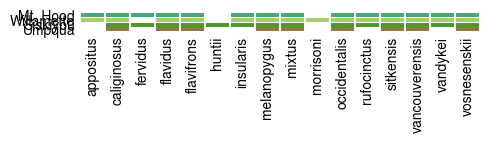

In [50]:
forest_colors = {
    "Siskiyou": "#4C9A2A",
    "Umatilla": "#8C7A3E",
    "Umpqua": "#8C7A3E",
    "Willamette": "#A8CC6F",
    "Mt. Hood": "#49A874"
}


all_species = sorted(set(s for sp_list in data.values() for s in sp_list))
species_abbrev = [s for s in all_species]

df = pd.DataFrame(0, index=data.keys(), columns=species_abbrev)
for nf, sp_list in data.items():
    for s in sp_list:
        df.loc[nf, s] = 1
custom_order = ["Umpqua", "Siskiyou", "Willamette", "Mt. Hood"]
df = df.reindex(custom_order)

fig, ax = plt.subplots(figsize=(5, 1.5))
square_size = 0.9
for i, nf in enumerate(df.index):
    for j, sp in enumerate(df.columns):
        if df.loc[nf, sp] == 1:
            rect = Rectangle(
                (j - square_size/2, i - square_size/2),
                square_size, square_size,
                facecolor=forest_colors[nf],
                edgecolor='none'
            )
            ax.add_patch(rect)

ax.set_xlim(-0.5, len(df.columns) - 0.5)
ax.set_ylim(-0.5, len(df.index) - 0.5)
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90, ha="center")
ax.set_yticks(range(len(df.index)))
ax.set_yticklabels(df.index)
ax.tick_params(axis='both', which='both', length=0)

for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()

# plt.savefig('figs/bombus_presence_table_umpqua.svg', bbox_inches='tight', pad_inches=0, format='svg', dpi=300)

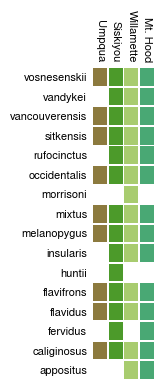

In [55]:
fig, ax = plt.subplots(figsize=(1.75, 4))

square_size = 0.9
for i, sp in enumerate(df.columns): 
    for j, nf in enumerate(df.index):
        if df.loc[nf, sp] == 1:
            rect = Rectangle(
                (j - square_size/2, i - square_size/2),
                square_size, square_size,
                facecolor=forest_colors[nf],
                edgecolor='none'
            )
            ax.add_patch(rect)

ax.set_xlim(-0.5, len(df.index) - 0.5)
ax.set_ylim(-0.5, len(df.columns) - 0.5)

ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index, rotation=270, ha="center", size=8)
ax.set_yticks(range(len(df.columns)))
ax.set_yticklabels(df.columns, size=8)
ax.xaxis.tick_top()

ax.tick_params(axis='both', which='both', length=0)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.savefig('figs/bombus_presence_table_vertical.svg', bbox_inches='tight', pad_inches=0, format='svg', dpi=300)
# plt.show()